<a href="https://colab.research.google.com/github/robajo12/data301_predictive_analytics_machine_learning/blob/main/ml_projects/Project_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Background 



### Data Acquisition

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
amz_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/amazon_alexa.tsv', sep='\t')

In [25]:
amz_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Data Wrangling

In [26]:
amz_df.shape

(3150, 5)

In [27]:
#show the missing data number
amz_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [28]:
amz_df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [30]:
amz_df.nunique()

rating                 5
date                  77
variation             16
verified_reviews    2301
feedback               2
dtype: int64

In [42]:
amz_df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [43]:
amz_df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [44]:
amz_df['date'].value_counts()

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
1-Jun-18        2
9-Jun-18        1
13-Jun-18       1
29-May-18       1
4-Jun-18        1
Name: date, Length: 77, dtype: int64

In [45]:
amz_df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [47]:
cm=amz_df.drop(['verified_reviews'], axis=1)
cm.head()

,rating,date,variation,feedback
0,5,31-Jul-18,Charcoal Fabric,1
1,5,31-Jul-18,Charcoal Fabric,1
2,4,31-Jul-18,Walnut Finish,1
3,5,31-Jul-18,Charcoal Fabric,1
4,5,31-Jul-18,Charcoal Fabric,1


In [67]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 302 kB/s 


In [68]:
import category_encoders as cten

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
cm_feature_names = ['rating', 'date', 'variation', 'feedback']
encoded_data = cten.OrdinalEncoder(cols=cm_feature_names)

In [71]:
enc_data_df = encoded_data.fit_transform(cm)

In [72]:
enc_data_df.head()

,rating,date,variation,feedback
0,1,1,1,1
1,1,1,1,1
2,2,1,2,1
3,1,1,1,1
4,1,1,1,1


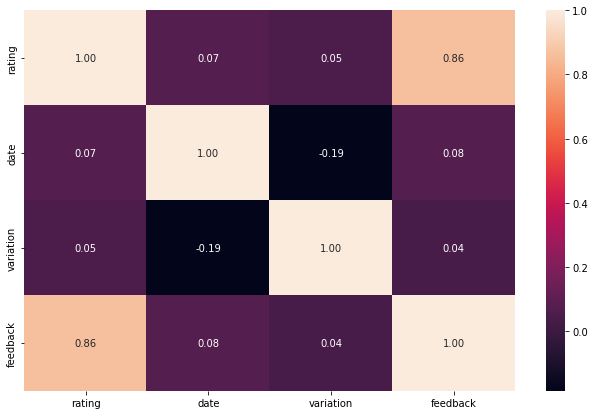

In [74]:
#relationships analysis
fig, axe = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(enc_data_df.corr(),ax=axe,fmt='.2f', annot=True )

In [49]:
amz_df['verified_reviews'][0]

'Love my Echo!'

In [51]:
max(amz_df['verified_reviews'].apply(len))

2851

In [54]:
long_msg= amz_df[amz_df['verified_reviews'].apply(len)==2851]
long_msg.verified_reviews

2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

In [58]:
long_msg.verified_reviews.iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [59]:
import string

In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
from nltk.corpus import stopwords

In [62]:
stopwords.words('english')[0:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

# Function 
### To Automate the text data pre processing part

In [63]:

def review_text_pre_process(text_review):
  remove_punct = [char for char in text_review if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords

In [66]:
amz_df['verified_reviews'].head(10).apply(review_text_pre_process)

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
5    [received, echo, gift, needed, another, Blueto...
6    [Without, cellphone, cannot, use, many, featur...
7    [think, 5th, one, Ive, purchased, Im, working,...
8                                       [looks, great]
9    [Love, I’ve, listened, songs, haven’t, heard, ...
Name: verified_reviews, dtype: object

In [ ]:
amz_df.head()

### EDA (Exploratory Data Analysis)

### ML Model

### Conclusion